In [2]:
import pandas as pd

data = pd.read_csv("Water_Scarcity.csv")

In [3]:
data.head()

,username,Name,Age of respondent,Gender,Marital status,Ethnicity,Religion,Highest level of education,Occupation,What is your estimated monthly household income?,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,hussain110,Ali,21- 25,Male,Single,Urdu speaking,Islam,Matric,Mobile repairing,Less than 25000,...,226143084,6e623c6b-06b6-40a3-8b0f-6e3f9ffd3d39,2023-03-18T22:05:13,Approved,NaN,submitted_via_web,hussain110,vKRkqRdBvbKbE7Kb4D3Re9,NaN,1
1,muhammadfaeezneduet,NaN,46 - 50,Female,Married,Punjabi,Christian,illiteracy,Maid,Less than 25000,...,226144679,755c40a3-c6c2-40ab-a51c-51c7c39a350e,2023-03-18T22:24:40,Approved,NaN,submitted_via_web,muhammadfaeezneduet,vKRkqRdBvbKbE7Kb4D3Re9,NaN,2
2,mairamumtaz029,Neelofer Khan,51 - 55,Female,Married,Urdu speaking,Islam,Upper primary (6-8),Housewife,56000 - 65000,...,226145404,5bfb7db9-71de-45d7-8da4-e500848c62d2,2023-03-18T22:36:32,Approved,NaN,submitted_via_web,mairamumtaz029,vKRkqRdBvbKbE7Kb4D3Re9,NaN,3
3,hussain110,NaN,46 - 50,Male,Married,Punjabi,Christian,illiteracy,Worker in Bahria university,46000 - 55000,...,226145503,99249bb9-02d1-44e2-a296-28d1a099ccd4,2023-03-18T22:38:10,Approved,NaN,submitted_via_web,hussain110,vKRkqRdBvbKbE7Kb4D3Re9,NaN,4
4,mairamumtaz029,Nimra,36 - 40,Female,Married,Pashto,Islam,illiteracy,Tailoring,Less than 25000,...,226147018,8aa3f589-bc6b-4f9c-b2b3-8dbd1c34775e,2023-03-18T23:12:30,Approved,NaN,submitted_via_web,mairamumtaz029,vKRkqRdBvbKbE7Kb4D3Re9,NaN,5


In [4]:
columns = list(data.columns)
columns

['username',
 'Name',
 'Age of respondent ',
 'Gender',
 'Marital status',
 'Ethnicity',
 'Religion',
 'Highest level of education',
 'Occupation',
 'What is your estimated monthly household income?',
 'Typology of household',
 'Type of house ',
 'House Area (Sq yds.)',
 'How long have you been living in this house? ( in years)',
 'Land Status',
 'Land entitlment',
 'If Rented , what is the rent of the house?',
 'Family Type',
 'No. of household members ',
 'Do you have a KW&SB line connection? ',
 'If yes, how did you get the connection? ',
 'If other',
 'Did you get the conection individualy or collectively? ',
 'Did you pay extra charges to get KW&SB service? ',
 'If Yes, how much did you pay?',
 'How many days do you get water in a week? ',
 'For how many hours is water supplied? ',
 ' How is the water stored in your place of residence ?/Underground tank',
 ' How is the water stored in your place of residence ?/Overhead tank',
 ' How is the water stored in your place of residence ?

In [5]:
# List of unnecessary columns to drop
columns_to_drop = [
    'username', 'Name', '_Coordinates _latitude', '_Coordinates _longitude', 
    '_Coordinates _altitude', '_Coordinates _precision', 'status of interview ?', 
    '_id', '_uuid', '_submission_time', '_validation_status', '_notes', '_status',
    '_submitted_by', '__version__', '_tags', '_index'
]

# Drop the unnecessary columns from the DataFrame
data = data.drop(columns=columns_to_drop)

# Check the shape of the modified DataFrame
print(data.shape)

(180, 450)


In [6]:
# Assuming "Water is sufficient?" is your target variable
target_column = 'Is the water available sufficient?'

# List of selected feature columns
feature_columns = [
    'Age of respondent ', 'Gender', 'Marital status', 'Religion',
    'Highest level of education', 'Occupation', 'No. of household members ',
    'How many days do you get water in a week? ', 'For how many hours is water supplied? ',
    ' How is the water stored in your place of residence ?/Underground tank',
    ' How is the water stored in your place of residence ?/Overhead tank',
    'How is the quality of water you receive? /Sweet',
    'How is the quality of water you receive? /Sewerage water mixed with line water',
    'How is the quality of water you receive? /Water has bad taste',
    'How is the quality of water you recieve? /Water is brackish',
    'How is the quality of water you recieve? /Sand mixed with water',
    'How is the quality of water you receive? /Water has bad odour',
    'How is the quality of water you receive? /Mixed water sweet and brackish',
    'If quality of water is not good, what purification methods do you use before using it? check all that apply/Sulphur',
    'If quality of water is not good, what purification methods do you use before using it? check all that apply/Chlorine',
    'If quality of water is not good, what purification methods do you use before using it? check all that apply/Phitkari',
]

# Create a new DataFrame with selected columns
selected_data = data[feature_columns + [target_column]]

# Check the shape of the selected DataFrame
print(selected_data.shape)

(180, 22)


In [7]:
selected_data

,Age of respondent,Gender,Marital status,Religion,Highest level of education,Occupation,No. of household members,How many days do you get water in a week?,For how many hours is water supplied?,How is the water stored in your place of residence ?/Underground tank,...,How is the quality of water you receive? /Sewerage water mixed with line water,How is the quality of water you receive? /Water has bad taste,How is the quality of water you recieve? /Water is brackish,How is the quality of water you recieve? /Sand mixed with water,How is the quality of water you receive? /Water has bad odour,How is the quality of water you receive? /Mixed water sweet and brackish,"If quality of water is not good, what purification methods do you use before using it? check all that apply/Sulphur","If quality of water is not good, what purification methods do you use before using it? check all that apply/Chlorine","If quality of water is not good, what purification methods do you use before using it? check all that apply/Phitkari",Is the water available sufficient?
0,21- 25,Male,Single,Islam,Matric,Mobile repairing,8,4.0,1 - 2 hrs,1.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,46 - 50,Female,Married,Christian,illiteracy,Maid,9,4.0,1 - 2 hrs,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN
2,51 - 55,Female,Married,Islam,Upper primary (6-8),Housewife,5,7.0,3 - 4 hrs,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,46 - 50,Male,Married,Christian,illiteracy,Worker in Bahria university,10,4.0,7 - 8 hrs,1.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,36 - 40,Female,Married,Islam,illiteracy,Tailoring,7,7.0,1 - 2 hrs,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,41 - 45,Male,Single,Islam,Matric,Banker,7,7.0,3 - 4 hrs,1.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Yes
176,31 - 35,Male,Married,Islam,Intermediate,Factory worker,10,7.0,7 - 8 hrs,1.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,No
177,56 - 60,Male,Married,Islam,M.phil,Professor/ entomologist,4,4.0,Less than 1 hrs,1.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,No
178,56 - 60,Female,Married,Islam,Graduate,Retired,5,4.0,Less than 1 hrs,1.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,No


In [8]:
selected_data[' How is the water stored in your place of residence ?/Underground tank'].value_counts()

 How is the water stored in your place of residence ?/Underground tank
1.0    122
0.0     16
Name: count, dtype: int64

In [9]:
selected_data[' How is the water stored in your place of residence ?/Overhead tank'].value_counts()

 How is the water stored in your place of residence ?/Overhead tank
1.0    112
0.0     26
Name: count, dtype: int64

In [10]:
quality = ['How is the quality of water you receive? /Sweet',
'How is the quality of water you receive? /Sewerage water mixed with line water',
'How is the quality of water you receive? /Water has bad taste',
'How is the quality of water you recieve? /Water is brackish',
'How is the quality of water you recieve? /Sand mixed with water',
'How is the quality of water you receive? /Water has bad odour',
'How is the quality of water you receive? /Mixed water sweet and brackish']

for i in quality:
    print('--------------------------------')
    print(selected_data[i].value_counts())
    print('--------------------------------')

--------------------------------
How is the quality of water you receive? /Sweet
0.0    39
1.0    10
Name: count, dtype: int64
--------------------------------
--------------------------------
How is the quality of water you receive? /Sewerage water mixed with line water
0.0    48
1.0     1
Name: count, dtype: int64
--------------------------------
--------------------------------
How is the quality of water you receive? /Water has bad taste
0.0    45
1.0     4
Name: count, dtype: int64
--------------------------------
--------------------------------
How is the quality of water you recieve? /Water is brackish
0.0    134
1.0      4
Name: count, dtype: int64
--------------------------------
--------------------------------
How is the quality of water you recieve? /Sand mixed with water
0.0    117
1.0     21
Name: count, dtype: int64
--------------------------------
--------------------------------
How is the quality of water you receive? /Water has bad odour
0.0    47
1.0     2
Name: co

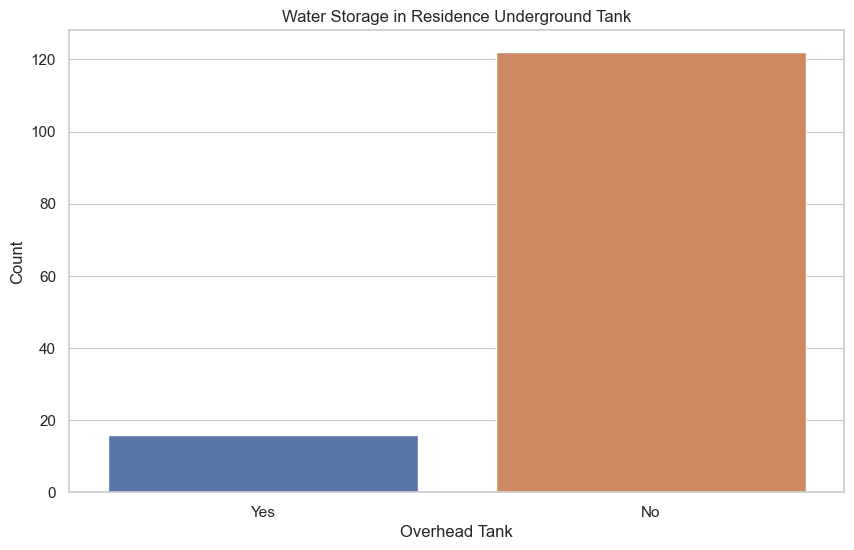

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the bar chart
ax = sns.barplot(x=selected_data[' How is the water stored in your place of residence ?/Underground tank'].value_counts().index,
                y=selected_data[' How is the water stored in your place of residence ?/Underground tank'].value_counts().values)

# Customize the plot
ax.set(xlabel="Overhead Tank", ylabel="Count")
ax.set_xticklabels(['Yes', 'No'])  # You can customize the labels
plt.title("Water Storage in Residence Underground Tank")

# Show the plot
plt.show()


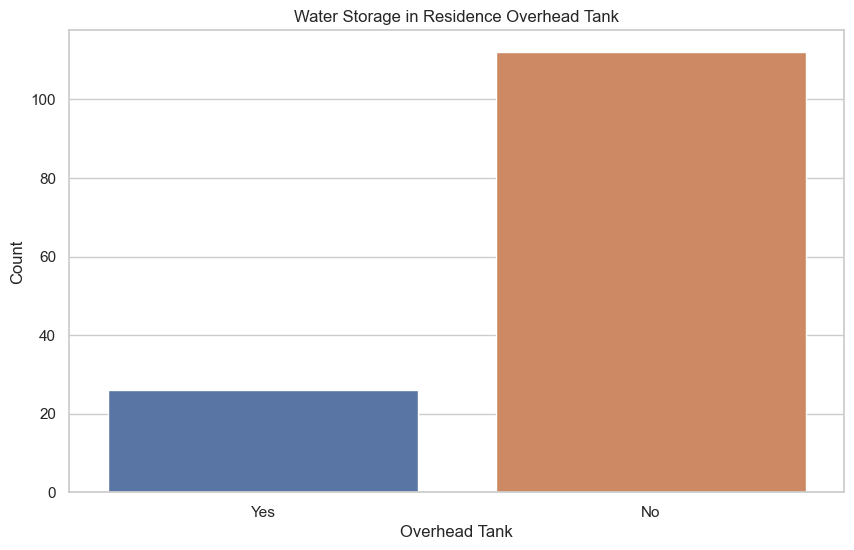

In [12]:
# Create a bar chart
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the bar chart
ax = sns.barplot(x=selected_data[' How is the water stored in your place of residence ?/Overhead tank'].value_counts().index,
                y=selected_data[' How is the water stored in your place of residence ?/Overhead tank'].value_counts().values)

# Customize the plot
ax.set(xlabel="Overhead Tank", ylabel="Count")
ax.set_xticklabels(['Yes', 'No'])  # You can customize the labels
plt.title("Water Storage in Residence Overhead Tank")

# Show the plot
plt.show()

In [16]:
selected_data['Is the water available sufficient?'].value_counts()

Is the water available sufficient?
Yes    81
No     80
Name: count, dtype: int64

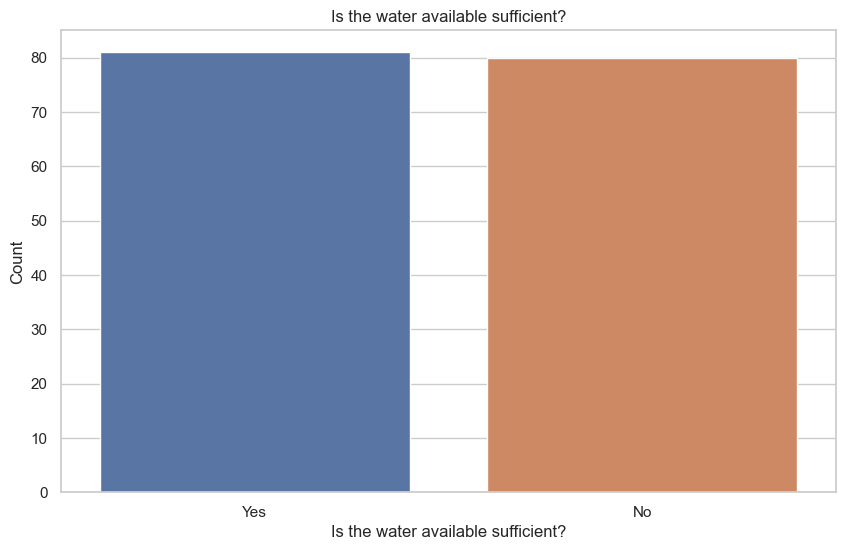

In [18]:
# Create a bar chart
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the bar chart
ax = sns.barplot(x=selected_data['Is the water available sufficient?'].value_counts().index,
                y=selected_data['Is the water available sufficient?'].value_counts().values)

# Customize the plot
ax.set(ylabel="Count")
ax.set_xticklabels(['Yes', 'No'])  # You can customize the labels
plt.title("Is the water available sufficient?")

# Show the plot
plt.show()